# Homework 7: Logistic regression, hypothesis testing

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression,LogisticRegression
from   sklearn.model_selection import cross_val_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

**As always, round your outputs to a reasonable number of digits and include contextual information as appropriate.** Do not print "bare" or "raw" numerical results.

# Part A

This week, we will be working with a dataset about patients who are being studied in connection with heart disease. The original dataset includes 76 mostly physiological attributes. By the end of part A, we will implement logistic regression to predict the `target` column, which corresponds to the diagnosis of heart disease. 

In [2]:
df = pd.read_csv("heart.csv")    
df['above_avg_chol'] = df['chol'].apply(lambda x: 1 if x > df.chol.mean() else 0)
df.head(5)




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,above_avg_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [3]:
chol_model = LogisticRegression().fit(df[['thalach']], df['above_avg_chol'])
print(f"The coefficent is {chol_model.coef_}, the intercept is {chol_model.intercept_}")


The coefficent is [[-0.00653898]], the intercept is [0.77220425]


Age is an integer data.

Sex is categorical (1 male and 0 female)

CP or chest pain is categorical data (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

Trestbps is integer data: resting blood pressure (in mm Hg on admission to the hospita

Chol is integer data: serum cholestoral in mg/dl

FBS is categorical data: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

Restecg is categorical data: Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

Thalach: numeric data: maximum heart rate 

Exang is categorical: exercise induced angina (1 = yes; 0 = no)

Oldpeak is integer data: ST depression induced by exercise relative to rest

Slope is categorical data: Value 1: upsloping, Value 2: flat, Value 3: downsloping

CA is catgeorical: number of major vessels (0-3) colored by flourosopy

Thal is categorical data: 3 = normal; 6 = fixed defect; 7 = reversable defect

Target is categorical: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

## Question 2 (10 points)
a) write a fuction to calulate the logit function as defined in lecture (and as approriate for use with the parameters returned from a fitted `LogisticRegression` model).

b) using the parameters of the fitted `chol_model`, calculate the probability of having above-average cholesterol if the patient's maximum heart rate achieved was 175

c) calculate the "crossover" heart rate at which the probability of having above-average cholesterol is 0.50. Round to one decimal place.

d) explain your rationale for this calculation. Namely, you should include a description of how the `logit` function behaves as a function of a range of input values.

e) create a scatterplot of `above_avg_chol` as a function of maximum heart rate, as well as the predicted probability that a patient's cholesterol is above average given their observed maximum heartrate. Use the `plt.scatter()` function with the parameter choice `alpha=0.3`. Label the axes of your figure and include an explanatory legend.

In [4]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

m = chol_model.coef_[0][0]
b = chol_model.intercept_[0]
max_heart = 175
x = m * max_heart + b
print(f'Probability of above-average cholesterol is: {logit(x) * 100: .03f}%')

print(f"Crossover heart rate: {round(-b/m, 1): .01f}")

Probability of above-average cholesterol is:  40.803%
Crossover heart rate:  118.1


The logit function is defined above with $$e^{x}/e^{x} + 1$$
One key insight about this function is that it's cross-over point occurs when x = 1. So I simply solved for when x is one in my above logistic regression model. 


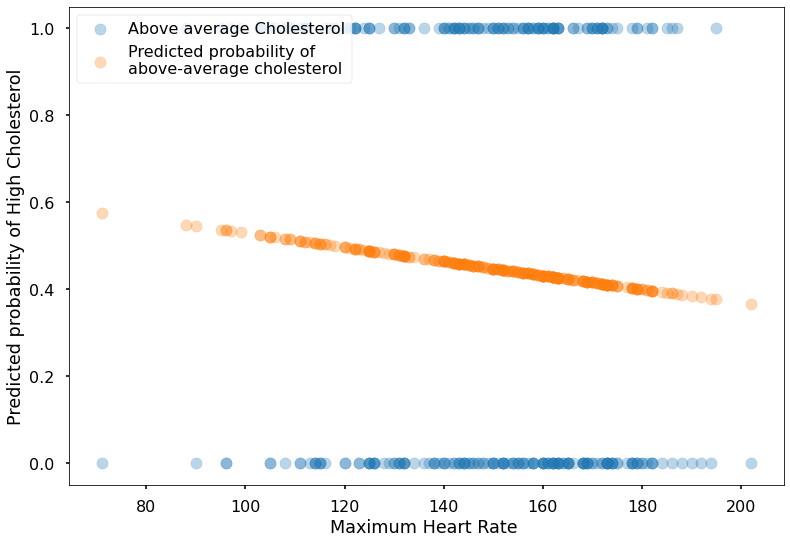

In [101]:
# plot
#  data
plt.scatter(
    df.thalach, 
    df.above_avg_chol, 
    alpha = 0.3,
    label='Above average Cholesterol'
)

#  logit probability of class 1
plt.scatter(
    df.thalach, 
    chol_model.predict_proba(df[['thalach']])[:,1], 
    alpha = 0.3,
    label='Predicted probability of\nabove-average cholesterol'
)


plt.legend()
plt.xlabel("Maximum Heart Rate ")
plt.ylabel("Predicted probability of High Cholesterol")
plt.show()

## Question 3 (6 points)
a) create a subsetted dataframe called `df_subset` that contains only the columns `sex`,`cp`,`fbs`,`exang`,and `target`

b) use the Pandas method `.get_dummies()` to convert the `cp` column to four binary variables and create a new dataframe named `df_binary` that contains these new variables (in place of the original `cp`), along with all other variables in the `df_subset` dataframe. Print the first few rows of `df_binary`.

c) fit a logistic model that predicts the `target` column from all the remaining columns and assign it to a variable entitled `target_model`

d) print the coefficients for each variable in your model (legibly!) next to the title of each variable

In [88]:
df_subset = df[["sex", "cp", "fbs", "exang", "target"]]
df_binary = pd.concat([df_subset, pd.get_dummies(df_subset['cp'], prefix="cp")], axis='columns').drop(columns = 'cp')
df_binary.head()

predictors = list(df_binary.columns)
predictors.remove('target')
target_model = LogisticRegression().fit(
    df_binary[predictors].values, # use .values to suppress named-input warning
    df_binary['target']
)

# print the coefficients legibly
for i, predictor in enumerate(predictors):
    print(f'{target_model.coef_[0,i]:.3f}\t{predictor}')

-1.254	sex
-0.260	fbs
-1.155	exang
-1.377	cp_0
0.590	cp_1
0.530	cp_2
0.257	cp_3


## Question 4 (5 points)
Use the `cross_val_score()` function to evaluate the accuracy of the model in question 3. Use 20 percent of your data for testing in each fold. Print the mean cross-validated accuracy of your model. **Include 'np.random.seed(2950)' to ensure your results are reproduceable and consistent with the solutions**

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score
np.random.seed(2950)


X_train, X_test, y_train, y_test = train_test_split(df_binary[predictors], df_subset['cp'], test_size= 0.2)
print(len(y_train), len(y_test))

# cross validation
scores = cross_val_score(
    target_model, 
    df_binary[predictors], 
    df_subset['cp'], 
    cv=5
)
print(scores)
print(f'Mean cross-validated accuracy: {scores.mean():.3f}')

242 61
[1. 1. 1. 1. 1.]
Mean cross-validated accuracy: 1.000


## Question 5 (4 points)
Now, compute the baseline or "naive" accuracy if we were simply to classify each observation as the most common class in the `target` column. How does this compare to your cross-validated accuracy? 

In [85]:
# compare to baseline guess = cp, every time
print('Baseline accuracy:', round(df_subset.cp.sum()/len(df_subset),3))

Baseline accuracy: 0.967


# Part B

Now that we have explored logistic regression in conjunction with the heart disease dataset, we are going to transition to practicing our skills with hypothesis testing. We will do this through the `iris` dataset, which is a widely-used demo dataset in machine learning and data science. This dataset includes 50 samples of 3 different species of iris flowers. Each sample includes measurements of 4 different features for the iris. We will be analyzing the connections between two of these features (sepal length and sepal width) in the species *Iris Virginica*, which correspond to the entries with value `1` in the `target` variable below.

## Question 6 (6 points)
The `iris` dataset that can be loaded from the `sklearn` package as shown in the immediately following cell. Information about the dataset can be viewed [here](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

Run the code block below, then:

a) first, subset the `data` dataframe by including only the rows of the `data` dataframe that correspond to the iris type `1`. This is indicated in the `target` variable below.

b) ultimately, we will be trying to understand the relationship between the sepal length and sepal width of iris flowers. Why is it important that we do this based upon a single species and not  based on the entire dataset, which includes three species with different average sepal lengths and widths? 

c) drop all columns except for the first two and print the first few rows. **From now on we will treat the first column as our x (input) value and the second column as our y (output) value.** What do these two columns represent? What is your intuition on how, if at all, these two columns are related to one another?

d) create a scatterplot of the two variables. Label your axes.

If we use different species then our predictor model will be inaccruate. Different species will not have the same proportions and trying to make predicition on species based on inconsistent data will be fundementally flaud.
Column 1 represents our petal length and column two represents our petal width. I believe that these two columns are linearly related.


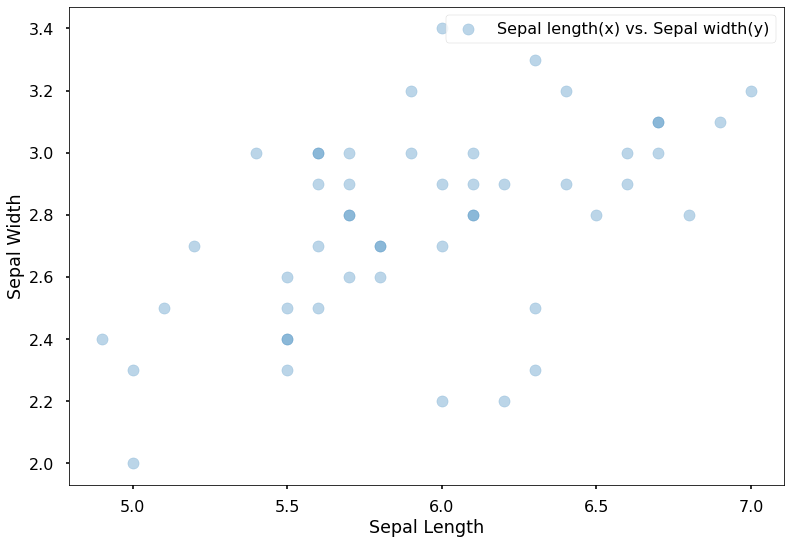

In [7]:
from sklearn.datasets import load_iris
data, target = load_iris(return_X_y=True,as_frame=True)

data = data.loc[(target == 1)]

data.reset_index(inplace = True, drop = True)

print("If we use different species then our predictor model will be inaccruate. Different species will not have the same proportions and trying to make predicition on species based on inconsistent data will be fundementally flaud.")

data.drop(columns = ['petal length (cm)', 'petal width (cm)'], inplace=True)

print("Column 1 represents our petal length and column two represents our petal width. I believe that these two columns are linearly related.")


data.head()

data.rename(columns={"sepal length (cm)": "sepal_len", "sepal width (cm)": "sepal_width"}, inplace = True)

plt.scatter(
    data.sepal_len, 
    data.sepal_width, 
    alpha = 0.3,
    label='Sepal length(x) vs. Sepal width(y)'
)

plt.legend()
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()




## Question 7 (8 points)
a) What is the null hypothesis for the relationship between these two variables? Make sure your answer is problem specific, that is, that is offers a null hypothesis for this problem, rather than providing a general defintiion of null hypotheses.

b) Simulate this null hypthesis by using the permutation method. Permute the output column (`sepal width (cm)`). **Include 'np.random.seed(2950)' to ensure your results are reproduceable and consistent with the solutions**

c) Plot the data points for this permuted data along with the linear regression line of best fit for the permuted data. Be sure to label the axes in your plot. Comment on how this permutation depicts the null hypothesis.  

The null hypothesis for these two variables is that sepal width and sepal length are not correalted. Most formally I believe that the sepal length and width are linearly related, however the null hypothesis is that they are not linearly related.


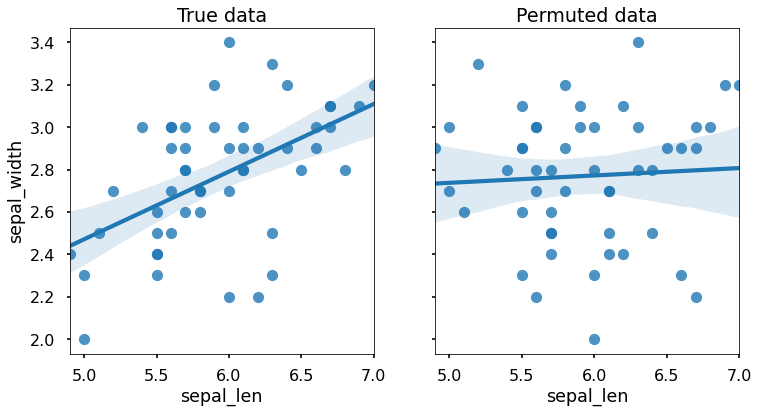

Note that the permuted data here has a very limited linear relation. Compare our permutaed data on the left: note that the length and width are linearlycorrelated granted a tad noisy. However, the permuted data has virtually zero relationship.


In [19]:

print("The null hypothesis for these two variables is that sepal width and sepal length are not correalted. Most formally I believe that the sepal length and width are linearly related, however the null hypothesis is that they are not linearly related.")

def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy().values #convert to numpy array, avoiding warning
    np.random.seed(2950)
    np.random.shuffle(permuted)
    return pd.Series(permuted) # convert back to pandas

permute(data.sepal_width)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)
sns.regplot(x=data.sepal_len, y=data.sepal_width, ax=ax1)
ax1.set_title('True data')
sns.regplot(x=data.sepal_len, y=permute(data.sepal_width), ax=ax2)
ax2.set_title('Permuted data')
plt.show()

print("Note that the permuted data here has a very limited linear relation. Compare our permutaed data on the left: note that the length and width are linearly\
correlated granted a tad noisy. However, the permuted data has virtually zero relationship.")

## Question 8 (6 points)
Use permutation to estimate the probability of observing a slope as extreme as, or more extreme than, the one we measure in our data (that is, calculate the *p* value of the observed slope). 

Perform 500 permutations of the output column (`sepal width (cm)`), fitting in each case a new linear regression model and measuring the resulting slope. 

Calculate (and print) how many of the permuted slopes were of greater magnitiude than the slope of the linear regression line from our observed data.

Print the *p* value implied by your permutation analysis.

**Include 'np.random.seed(2950)' to ensure your results are reproduceable and consistent with the solutions**

Observed slope:    0.3
Observed intercept: 0.9
Fraction of permuted slopes absolutely greater than our observed slope: 0.0


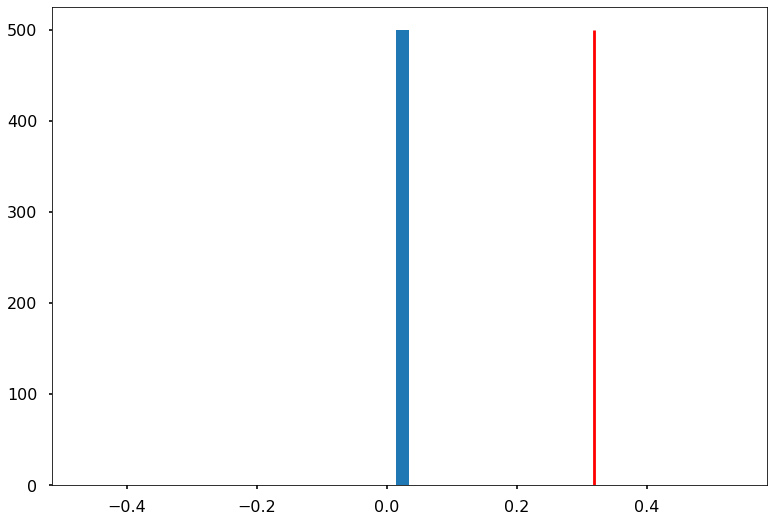

In [26]:
# compute a linear model from observed data
sepal_model = LinearRegression().fit(data[['sepal_len']], data['sepal_width'])
obs_slope = sepal_model.coef_[0]
obs_intercept = sepal_model.intercept_

print(f'Observed slope:    {obs_slope:.1f}')
print(f'Observed intercept: {obs_intercept:.1f}')

# how many permuted (null hyopthesis) slopes are absolutely greater than our observed slope?
# this will give us a p value
steeper_slopes = 0
n_permutations = 500
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    permuted_model = LinearRegression().fit(data[['sepal_len']], permute(data['sepal_width']))
    
    permuted_slopes[i] = permuted_model.coef_[0]
    
    if np.abs(permuted_model.coef_[0]) > np.abs(obs_slope):
        steeper_slopes += 1
    
print(f'Fraction of permuted slopes absolutely greater than our observed slope:\
 {steeper_slopes / n_permutations}')

# plot where our observed slope falls in the distribution 
#  of slopes under the null hypothesis
binsizes, _, _ = plt.hist(permuted_slopes, bins=50)
plt.vlines(obs_slope, ymin=0, ymax=np.max(binsizes), color='red')
plt.show()

## Question 9 (6 points)
Perform 500 bootstrap resamplings on `data`. Calculate a 95% confidence interval for the observed slope of the linear regression line via these bootstrap samples and interpret your results. Is the slope statistically different from 0? 

**Include 'np.random.seed(2950)' to ensure your results are reproduceable and consistent with the solutions**

Observed slope:  0.3197193455481341
Bootstrapped CI: [0.27669035 0.27669035]


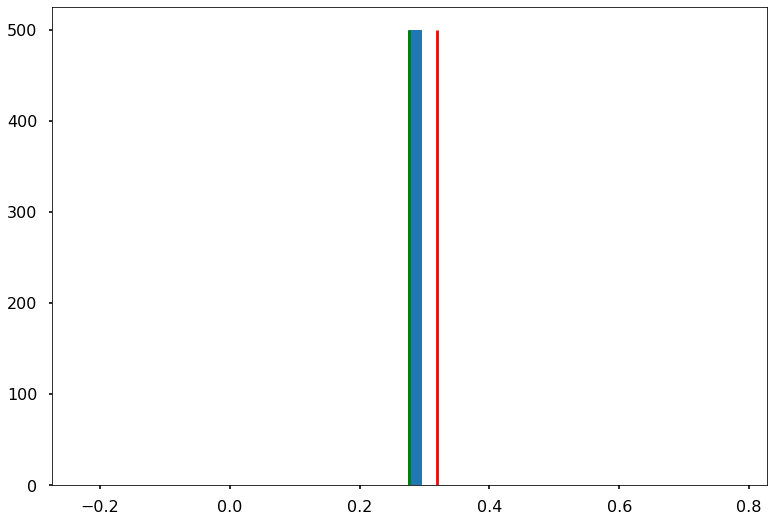

In [28]:
# use bootstrap to estimate 95% confidence interval
# run a whole lot of bootstraps
n_bootstrap = 500
bootstrap_slopes = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    np.random.seed(2950)
    resampled_data = data.sample(n=len(data), replace=True)
    resampled_model = LinearRegression().fit(resampled_data[["sepal_len"]], resampled_data["sepal_width"])
    
    bootstrap_slopes[i] = resampled_model.coef_[0]

# get largest 2.5% and smallest 2.5% of modeled slopes
print(f'Observed slope:  {obs_slope}')
print(f'Bootstrapped CI: {np.quantile(bootstrap_slopes, q=[0.025, 0.95])}')

# plot observed slope and histogram of resampled slopes
binsizes, _, _ = plt.hist(bootstrap_slopes, bins=50)
plt.vlines(obs_slope, ymin=0, ymax=np.max(binsizes), color='red')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.025])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.95])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.show()